# Lunar Rocks Classification using MobileNet model

In [14]:
import keras
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [2]:
import os
print("Current dir: "+os.getcwd())
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.regularizers import l1

Current dir: C:\Users\user


In [3]:
from keras.models import load_model
mobile=keras.applications.mobilenet.MobileNet()



In [4]:
from tensorflow import *

# Original Model's Summary

In [5]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

# Customizing model according to our need

In [6]:
x=mobile.layers[-6].output                           # removing last 5 layers
p=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=p)
model.summary()                                  # new model's summary

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

# Attempt 1:
# Training only last 20 layers by setting all the remaining layers untrainable

In [7]:
for layer in model.layers[:-20]:          
    layer.trainable=False

In [8]:
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])  
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):     # customized Callback class
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.90):
            print('cancelling since validation accuracy has been reached to 90%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest',validation_split=0.05)
train_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=50,subset='training')
validation_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=10,subset='validation')
history=model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])

Found 11400 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Epoch 1/10
228/228 [==============================] - 374s 2s/step - loss: 0.0689 - accuracy: 0.9758 - val_loss: 0.1787 - val_accuracy: 0.8696
Epoch 2/10
228/228 [==============================] - 349s 2s/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.0494 - val_accuracy: 0.8729
Epoch 3/10
228/228 [==============================] - 345s 2s/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.1320 - val_accuracy: 0.9415
cancelling since validation accuracy has been reached to 90%


# All the possible losses  and accuracy

In [9]:
history.history     # for every epoch        

{'val_loss': [0.17870843410491943, 0.04940180107951164, 0.1319914162158966],
 'val_accuracy': [0.8695651888847351, 0.8729097247123718, 0.9414715766906738],
 'loss': [0.06893184181637735, 0.028927433630757917, 0.0249437017120184],
 'accuracy': [0.9757895, 0.99008775, 0.9914035]}

In [24]:
os.chdir(r"C:\Users\user\Downloads\DataSet")
path=os.getcwd()
train=pd.read_csv("train.csv")
train_images=train['Image_File'].to_list()
    
y_pred=[]
for file in train_images:
    path_file=os.path.join(r"C:\Users\user\Downloads\DataSet\TI",file)
    img=image.load_img(path_file,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
y_pred_np=np.array(y_pred)
y_pred_np=y_pred_np.reshape(11998,2)
y_pred_final=y_pred_np.argmax(axis=1)
train_labels=train['Class']
train_labels.replace({'Large':0,'Small':1},inplace=True)
y=np.array(train_labels)

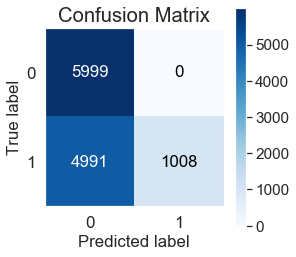

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred_final,figsize=(4,4))
# as we can observe that the result is pretty biased
# Our model has predicted 0 Class correctly but we have problem with the predictions of class 1


# Attempt 2:
# Lets change the no. of Trainable layers to 25


In [37]:
for layer in model.layers[:-25]:          
    layer.trainable=False

In [38]:
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])  
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):     # customized Callback class
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.90):
            print('cancelling since validation accuracy has been reached to 90%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest',validation_split=0.05)
train_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=50,subset='training')
validation_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=10,subset='validation')
history=model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])

Found 11400 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Epoch 1/10
228/228 [==============================] - 160s 701ms/step - loss: 0.0204 - accuracy: 0.9923 - val_loss: 0.0520 - val_accuracy: 0.9365
cancelling since validation accuracy has been reached to 90%


In [39]:
history.history     # for every epoch   

{'val_loss': [0.05201224982738495],
 'val_accuracy': [0.9364548325538635],
 'loss': [0.020415428976871465],
 'accuracy': [0.9922807]}

In [40]:
os.chdir(r"C:\Users\user\Downloads\DataSet")
path=os.getcwd()
train=pd.read_csv("train.csv")
train_images=train['Image_File'].to_list()
    
y_pred=[]
for file in train_images:
    path_file=os.path.join(r"C:\Users\user\Downloads\DataSet\TI",file)
    img=image.load_img(path_file,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
y_pred_np=np.array(y_pred)
y_pred_np=y_pred_np.reshape(11998,2)
y_pred_final=y_pred_np.argmax(axis=1)
train_labels=train['Class']
train_labels.replace({'Large':0,'Small':1},inplace=True)
y=np.array(train_labels)

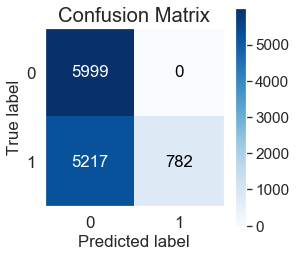

In [41]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred_final,figsize=(4,4))  # Results are even worst 

# Attempt 3:

# Lets use the original model

In [42]:

x=mobile.layers[-6].output                           # removing last 5 layers
p=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=p)
model.summary()  

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [43]:
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])  
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):     # customized Callback class
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.90):
            print('cancelling since validation accuracy has been reached to 90%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest',validation_split=0.05)
train_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=50,subset='training')
validation_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=10,subset='validation')
history=model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])

Found 11400 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Epoch 1/10
228/228 [==============================] - 165s 722ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.1450 - val_accuracy: 0.8612
Epoch 2/10
228/228 [==============================] - 163s 716ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0827 - val_accuracy: 0.9398
cancelling since validation accuracy has been reached to 90%


In [45]:
history.history     # for every epoch   

{'val_loss': [0.14500071108341217, 0.08274315297603607],
 'val_accuracy': [0.8612040281295776, 0.9397993087768555],
 'loss': [0.04859725736988414, 0.02511369461232486],
 'accuracy': [0.98570174, 0.99210525]}

In [46]:
os.chdir(r"C:\Users\user\Downloads\DataSet")
path=os.getcwd()
train=pd.read_csv("train.csv")
train_images=train['Image_File'].to_list()
    
y_pred=[]
for file in train_images:
    path_file=os.path.join(r"C:\Users\user\Downloads\DataSet\TI",file)
    img=image.load_img(path_file,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
y_pred_np=np.array(y_pred)
y_pred_np=y_pred_np.reshape(11998,2)
y_pred_final=y_pred_np.argmax(axis=1)
train_labels=train['Class']
train_labels.replace({'Large':0,'Small':1},inplace=True)
y=np.array(train_labels)

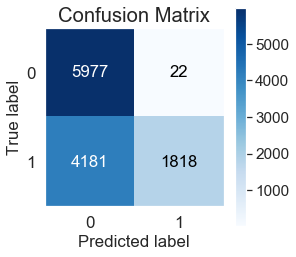

In [47]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred_final,figsize=(4,4)) 

# As we can observe from the above results that in order to get better result we have to Identify the best scenario